In [1]:
import fiona
import rasterio
import geoviews as gv
import gdal

import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

gv.extension('matplotlib')

gv.output(fig='png', size=300)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
from pysheds.grid import Grid

# http://hydro.iis.u-tokyo.ac.jp/~yamadai/MERIT_Hydro/

grid = Grid.from_raster('merit_hydro_dem_clip.tif', data_name='dem')

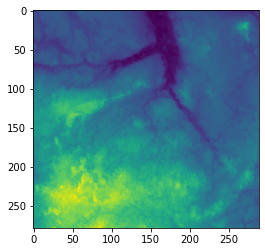

In [3]:
plt.imshow(grid.view('dem'))

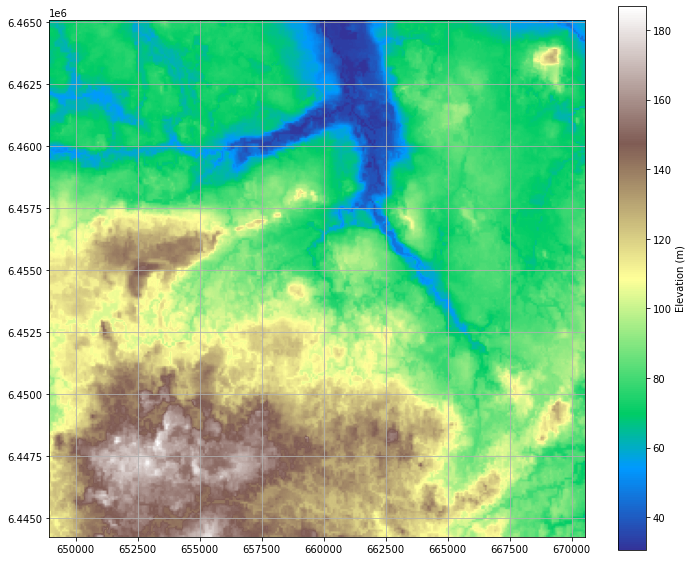

In [5]:
# https://www.hatarilabs.com/ih-en/watershed-and-stream-network-delimitation-with-python-and-pysheds-tutorial 

def plotFigure(data, label, cmap='Blues'):
    plt.figure(figsize=(12,10))
    plt.imshow(data, extent=grid.extent, cmap=cmap)
    plt.colorbar(label=label)
    plt.grid()

plotFigure(grid.dem, 'Elevation (m)', cmap='terrain')

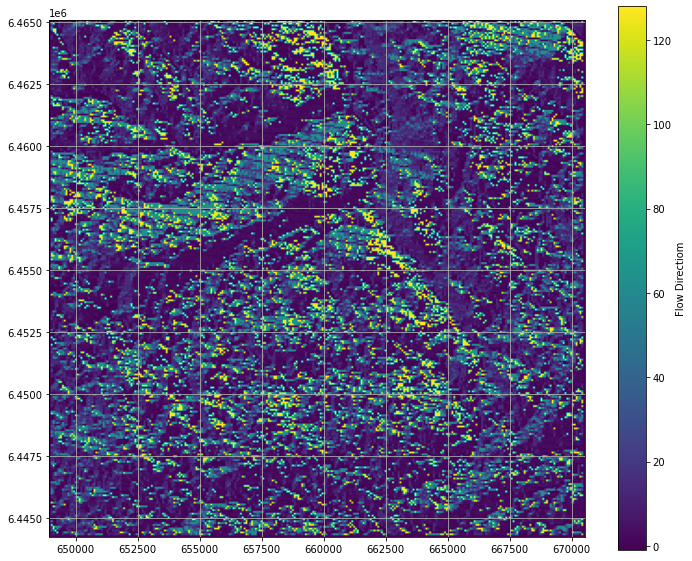

In [6]:
#N    NE    E    SE    S    SW    W    NW
dirmap = (64,  128,  1,   2,    4,   8,    16,  32)

grid.flowdir(data='dem', out_name='dir', dirmap=dirmap)

plotFigure(grid.dir,'Flow Directiom','viridis')

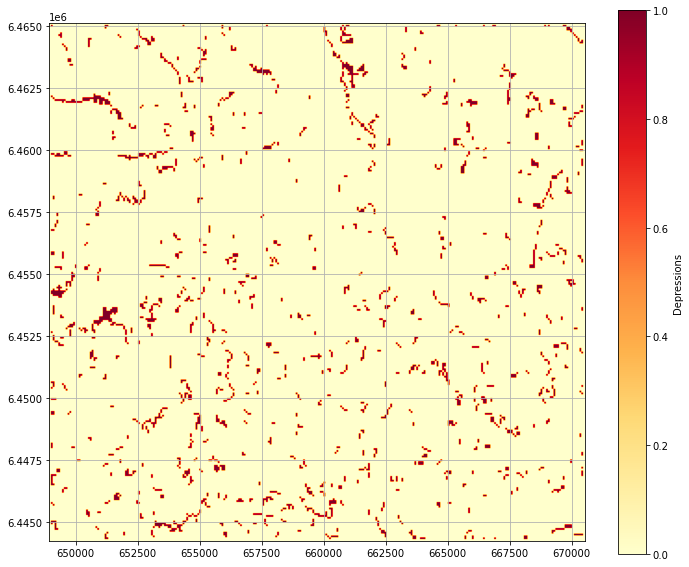

In [7]:
# Detect depressions
depressions = grid.detect_depressions('dem')

# Plot depressions
# plt.imshow(depressions)
plotFigure(depressions,'Depressions','YlOrRd')

In [8]:
# Fill depressions
grid.fill_depressions(data='dem', out_name='flooded_dem')

# Test result
depressions = grid.detect_depressions('flooded_dem')
depressions.any()

True

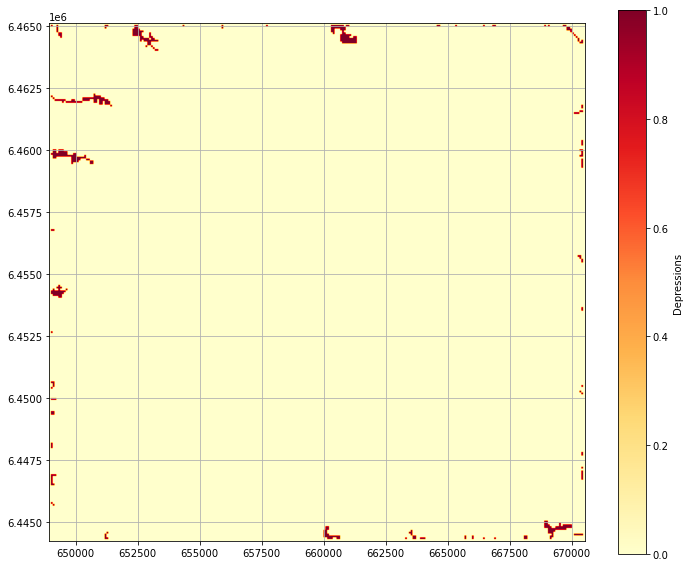

In [9]:
plotFigure(depressions,'Depressions','YlOrRd')

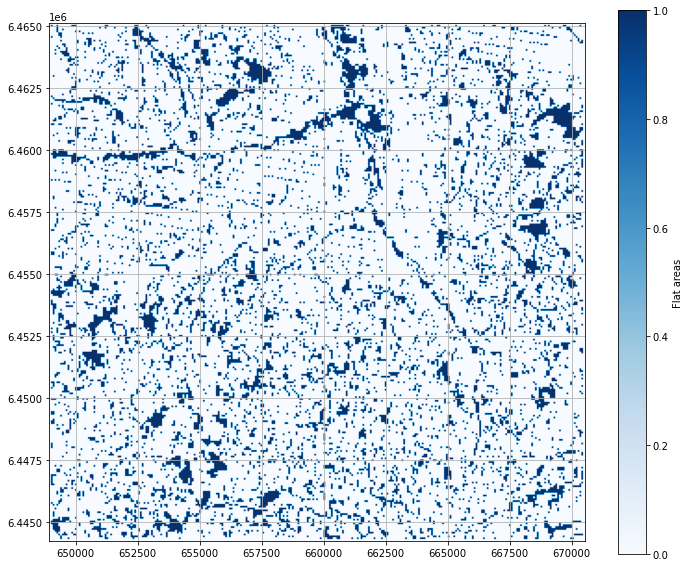

In [10]:
# Detect flats
flats = grid.detect_flats('flooded_dem')

# Plot flats
plotFigure(flats,'Flat areas','Blues')


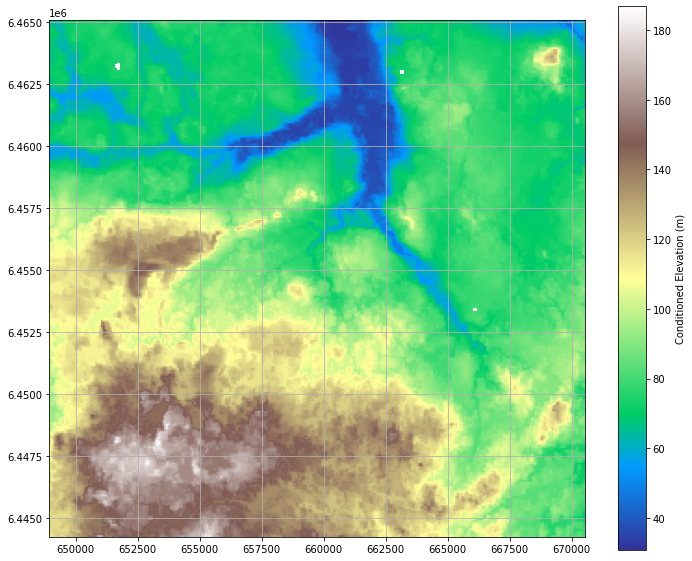

In [11]:
grid.resolve_flats(data='flooded_dem', out_name='inflated_dem')

plotFigure(grid.inflated_dem, 'Conditioned Elevation (m)', cmap='terrain')

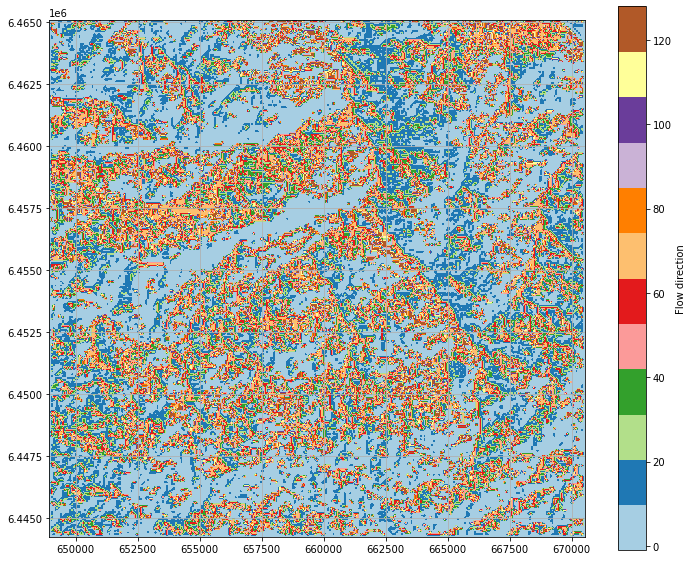

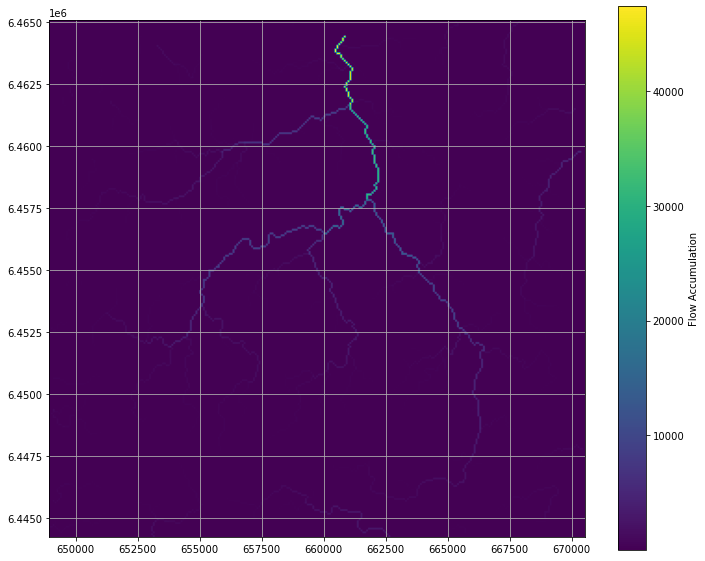

In [12]:
# Compute flow direction based on corrected DEM
grid.flowdir(data='inflated_dem', out_name='cond_dir', dirmap=dirmap)

plotFigure(grid.cond_dir, 'Flow direction', cmap='Paired')

# Compute flow accumulation based on computed flow direction
grid.accumulation(data='cond_dir', out_name='cond_acc', dirmap=dirmap)

plotFigure(grid.cond_acc, 'Flow Accumulation', cmap='viridis')

In [13]:
# load outlets from shape
outlet_main = gpd.read_file('reola_3301.shp')
outlets_sub = gpd.read_file('pori_catch_outlets.shp')

In [14]:
outlet_main

stations wmocode           longitude           latitude ascii_sani  ID  \
0    Reola   41184  26.741944444111112  58.27333333266667      reola  57   

   INLET  PTSOURCE  RES                        geometry  
0      0         0    0  POINT (660849.781 6462466.058)

In [15]:
outlets_sub

NAME         TYPE  order                        geometry
0      Porijogi_konsu        river      3  POINT (660639.971 6463732.943)
1               Vända        ditch      1  POINT (660016.089 6463416.999)
2               Tatra        river      1  POINT (657523.350 6460142.297)
3               Peeda        river      1  POINT (659947.737 6456595.775)
4              Idaoja  small river      1  POINT (660032.356 6456499.034)
5  Porijogi_keskjooks        river      2  POINT (661819.567 6457868.580)
6                Sipe        ditch      1  POINT (663797.152 6455287.943)
7      Porijogi_upper        river      1  POINT (666254.395 6448623.310)

In [16]:
# Specify pour point
x, y = outlet_main.loc[0, 'geometry'].x, outlet_main.loc[0, 'geometry'].y

# Delineate the catchment
# grid.catchment(data='cond_dir', x=x, y=y, out_name='catch',
#                    recursionlimit=15000, xytype='label')

# Plot the result
# grid.clip_to('catch')
# plt.imshow(grid.view('catch'))

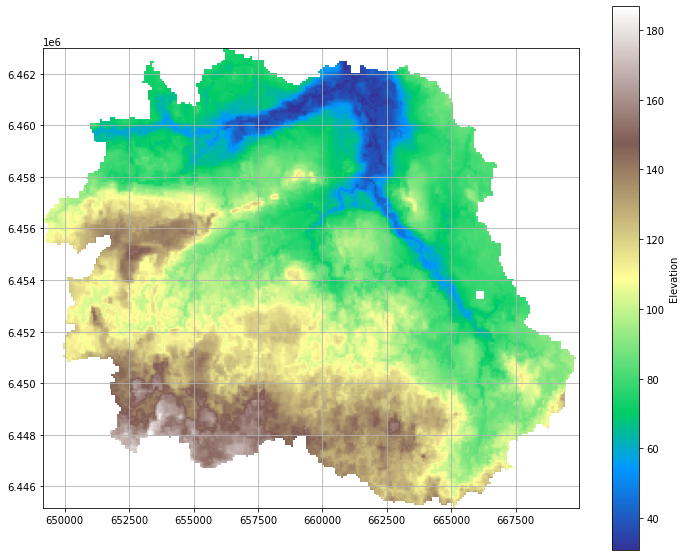

In [18]:
# Get a view of the catchment
# demView = grid.view('dem', nodata=np.nan)

# plotFigure(demView,'Elevation', 'terrain')

In [17]:
col, row = grid.nearest_cell(x, y)
col, row

(160, 35)

In [18]:
grid.cond_acc[9, :]

Raster([    3,     1,     1,     1,     4,     1,     2,     1,     1,
            1,     1,     2,     1,     1,     2,     9,     1,     1,
            9,     1,     2,    29,    21,    14,    13,     5,     4,
            3,     1,     2,     2,     1,     2,     4,    19,     2,
            1,     4,     1,     3,     6,    23,    25,     1,     2,
           31,     1,     1,     1,   302,     2,     4,     1,     1,
            1,     1,     2,     5,    38,     4,    16,     1,     5,
            1,     1,     1,     1,     6,    22,     1,     1,   100,
            9,     8,     4,     1,     1,     1,     4,     3,     2,
           45,     1,     9,     1,     2,     1,     1,     1,     1,
            1,     1,     1,     6,     1,     4,     1,     1,     1,
            3,    11,     1,     1,     1,     1,     1,     1,    12,
            1,     1,     1,     1,     1,     4,     7,     1,     1,
           35,     1,     1,    35,     1,     5,    30,     1,     1,
      

In [19]:
np.where(grid.cond_acc == 47390)

(array([9], dtype=int64), array([159], dtype=int64))

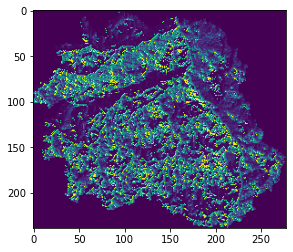

In [17]:
col, row = 159, 9

# Delineate the catchment
# grid.catchment(data='cond_dir', x=col, y=row, out_name='catch',
#                   recursionlimit=15000, xytype='index')

grid.catchment(data='cond_dir', x=x, y=y, out_name='catch',
                   recursionlimit=15000, xytype='label')
               
# Plot the result
grid.clip_to('catch')
plt.imshow(grid.view('catch'))

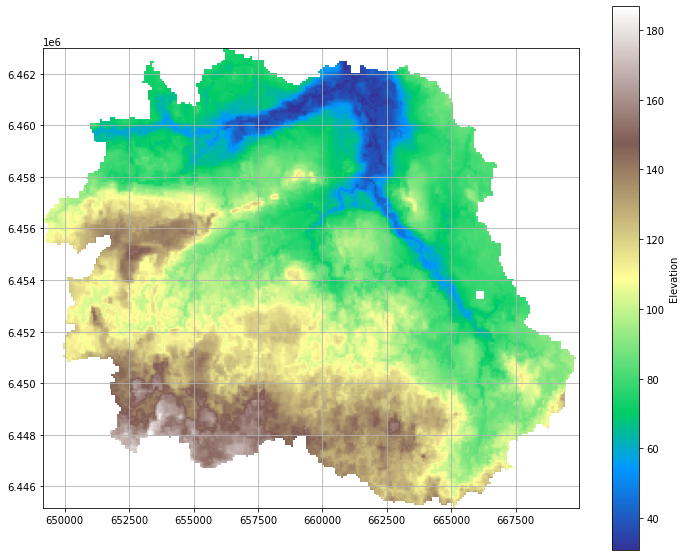

In [18]:
# Get a view of the catchment
demView = grid.view('dem', nodata=np.nan)

plotFigure(demView,'Elevation', 'terrain')

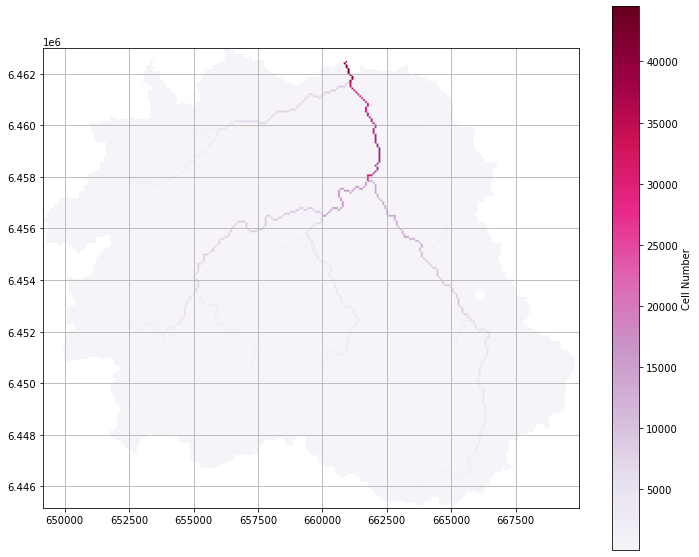

In [19]:
accView = grid.view('cond_acc', nodata=np.nan)
plotFigure(accView,"Cell Number",'PuRd')

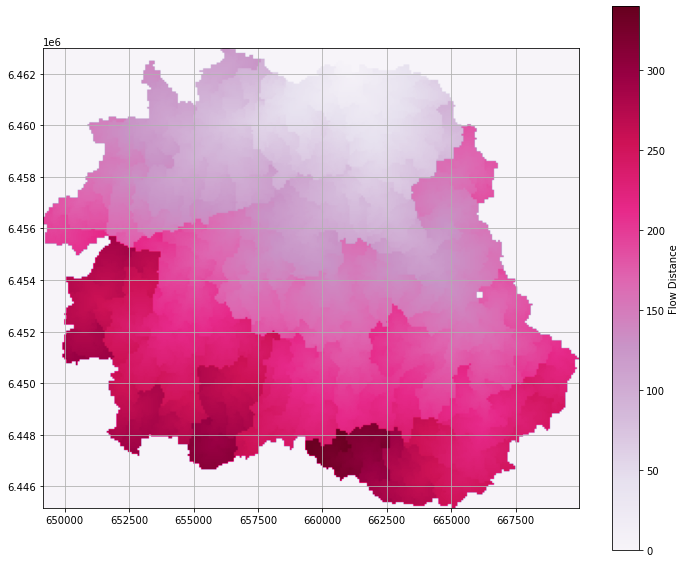

In [20]:
# Compute flow distance
# grid.flow_distance(x=col, y=row, data='catch', out_name='dist', xytype='index')
grid.flow_distance(x, y, data='catch', out_name='dist', xytype='label')

# Plot the result
plotFigure(grid.dist,"Flow Distance",'PuRd')

In [21]:
# Compute width function
W = np.bincount(grid.dist[grid.dist != 0].astype(int))

(array([ 5., 11.,  6., 13.,  7., 10.,  8., 10.,  5.,  5.,  6.,  6.,  2.,
         2.,  2.,  3.,  6.,  4., 11.,  9., 15.,  9., 11., 11., 11., 13.,
         7.,  6.,  4., 11., 16., 17., 15., 13., 15., 10.,  5.,  4.,  0.,
         4.,  2.,  3.,  0.,  2.,  1.,  2.,  0.,  1.,  1.,  1.]),
 array([  0.  ,   5.96,  11.92,  17.88,  23.84,  29.8 ,  35.76,  41.72,
         47.68,  53.64,  59.6 ,  65.56,  71.52,  77.48,  83.44,  89.4 ,
         95.36, 101.32, 107.28, 113.24, 119.2 , 125.16, 131.12, 137.08,
        143.04, 149.  , 154.96, 160.92, 166.88, 172.84, 178.8 , 184.76,
        190.72, 196.68, 202.64, 208.6 , 214.56, 220.52, 226.48, 232.44,
        238.4 , 244.36, 250.32, 256.28, 262.24, 268.2 , 274.16, 280.12,
        286.08, 292.04, 298.  ]),
 <BarContainer object of 50 artists>)

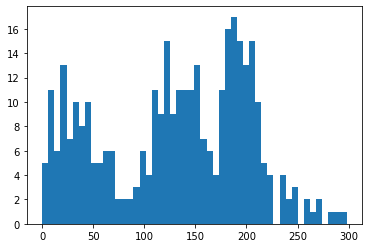

In [22]:
plt.hist(W, bins=50)

In [23]:
branches = grid.extract_river_network('catch', 'cond_acc')
type(branches)

geojson.feature.FeatureCollection

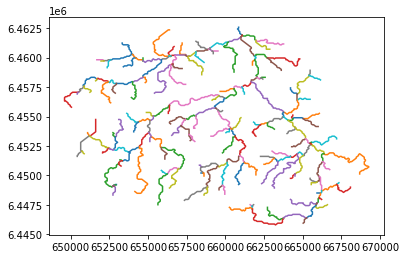

In [24]:
for branch in branches['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1])

In [40]:
branches_50 = grid.extract_river_network('catch', 'cond_acc', threshold=50)
branches_2 = grid.extract_river_network('catch', 'cond_acc', threshold=2)

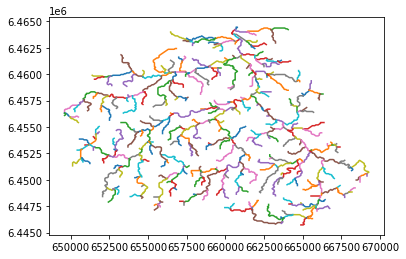

In [41]:
for branch in branches_50['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1])

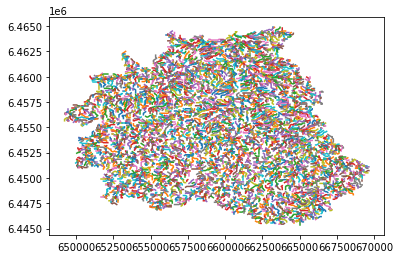

In [42]:
for branch in branches_2['features']:
    line = np.asarray(branch['geometry']['coordinates'])
    plt.plot(line[:, 0], line[:, 1])

In [25]:
#save geojson as separate file
def saveDict(dic,file):
    f = open(file,'w')
    f.write(str(dic))
    f.close()

#save geojson as separate file
saveDict(branches,'streams.geojson')


<AxesSubplot:>

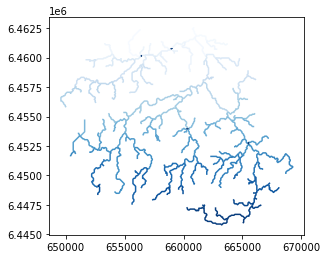

In [26]:
# Plot DEM and stream network

streamNet = gpd.read_file('streams.geojson')
streamNet.crs = 3301

streamNet.plot(cmap='Blues')

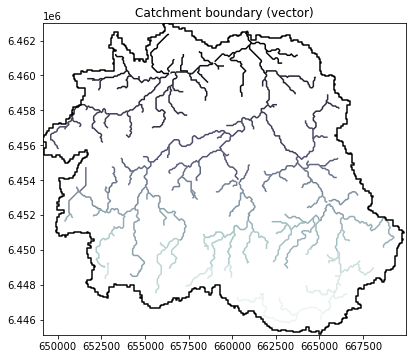

In [27]:
# The polygonize argument defaults to the grid mask when no arguments are supplied
shapes = grid.polygonize()

# Plot catchment boundaries
fig, ax = plt.subplots(figsize=(6.5, 6.5))

for shape in shapes:
    coords = np.asarray(shape[0]['coordinates'][0])
    ax.plot(coords[:,0], coords[:,1], color='black')

streamNet.plot(cmap='bone', ax=ax)

ax.set_xlim(grid.bbox[0], grid.bbox[2])
ax.set_ylim(grid.bbox[1], grid.bbox[3])
ax.set_title('Catchment boundary (vector)')

plt.show()

In [28]:
shapes = grid.polygonize()
shapes

<generator object shapes at 0x00000164BE795120>

In [29]:
# Specify schema
schema = {
    'geometry': 'Polygon',
    'properties': {'LABEL': 'float:16'}
}
shapes = grid.polygonize()

# Write shapefile
with fiona.open('catchment.shp', 'w',
                driver='ESRI Shapefile',
                crs=grid.crs.srs,
                schema=schema) as dest:
    i = 0
    for shape, value in shapes:
        rec = {}
        rec['geometry'] = shape
        rec['properties'] = {'LABEL' : str(value)}
        rec['id'] = str(i)
        dest.write(rec)
        i += 1

In [30]:
catchment = gpd.read_file('catchment.shp')

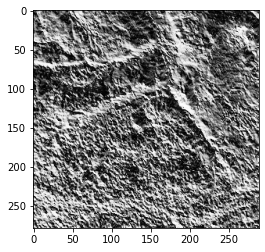

In [31]:
import earthpy.spatial as es

shade = es.hillshade(grid.dem)

plt.imshow(shade, cmap="Greys")

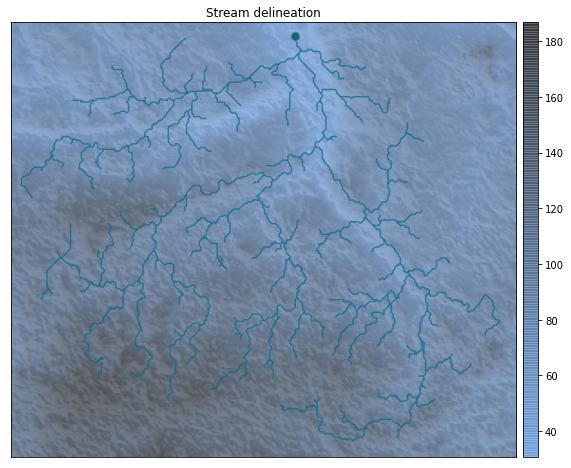

In [33]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import seaborn as sns

cm_ch = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, reverse=True)

cm_db = sns.dark_palette("#69d", reverse=True, as_cmap=True)

cm_db2 = sns.color_palette("dark:b", as_cmap=True)

fig, ax = plt.subplots(figsize=(12,8))

ep.plot_bands(shade, cmap='Greys', extent=grid.extent, ax=ax, alpha=0.3, cbar=None)

ep.plot_bands(grid.dem, cmap=cm_db, extent=grid.extent, ax=ax, alpha=0.7, title="Stream delineation")

streamNet.plot(color='#086A87', lw=1.5, ax=ax, zorder=10, alpha=0.7)

#catchment.boundary.plot(cmap=cm_db2, alpha=0.5, lw=1, ax=ax, zorder=9)

outlet_main.plot(color='#086A87', marker='o', markersize=75, edgecolor='grey', lw=1, ax=ax, zorder=11)

# plt.title("sss")
plt.show()
fig.savefig('../source/_static/day-09_monochrome.png', bbox_inches='tight')

In [72]:
grid.bbox

(649153.252574131, 6445136.189321534, 669942.7416764834, 6465031.506849592)